# THE2 - CENG403 Spring 2024

This document contains the backbone structure for the take-home exam. You should complete this template for your solution.

# 0 Some helper functions for algebraic operations

In [1]:
def vector_vector_product(v1, v2):
    if (len(v1) != len(v2)):
        raise ValueError("Dimensions do not match for vector - vector product!")
    result = sum([x * y for x,y in zip(v1, v2)]) 
    return result

def vector_matrix_product(v, m):       
    if (len(v) != len([row[0] for row in m])):
        raise ValueError("Dimensions do not match for vector - matrix product!")
    result = []
    l = len(m[0])
    for i in range(l):
        result.append(vector_vector_product(v, [row[i] for row in m]))
    return result

def vector_cube_product(v,c): # Here cube means thread dimensional tensor.
    if (len(v) != len([row[0] for row in c[0]])):
        raise ValueError("Dimensions do not match for vector - cube product!")
    result = []
    l = len(c)
    for i in range(l):
        result.append(vector_matrix_product(v, c[i]))
    return result

def create_identity_matrix(n):
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

def create_zero_square_matrix(n):
    result = []
    for i in range(n):
        temp = []
        for j in range(n):
            temp.append(n)
        result.append(temp)
    return result

def create_diagonal_matrix(diagonal_entry, n):
    return [[diagonal_entry if i == j else 0 for j in range(n)] for i in range(n)]
    

In [2]:
import random

def cekirdek(sayi: int):
    #Sets the seed for random number generation
    random.seed(sayi)

def rastgele_dogal(boyut, aralik=None, dagilim='uniform'):
    """
    Generates data of specified dimensions with random integer values and returns a gergen object.

    Parameters:
    boyut (tuple): Shape of the desired data.
    aralik (tuple, optional): (min, max) specifying the range of random values. Defaults to None, which implies a default range.
    dagilim (string, optional): Distribution of random values ('uniform' or other types). Defaults to 'uniform'.

    Returns:
    gergen: A new gergen object with random integer values.
    """

    # Set a default range if aralik is not provided
    if aralik is None:
        aralik = (0, 10)

    def generate_random_data(shape):
        if len(shape) == 1:
            return [random_value(aralik, dagilim) for _ in range(shape[0])]
        else:
            return [generate_random_data(shape[1:]) for _ in range(shape[0])]

    def random_value(aralik, dagilim):
        if dagilim == 'uniform':
            return random.randint(*aralik)
        else:
            raise ValueError(f"Unsupported distribution: {dagilim}")

    data = generate_random_data(boyut)
    return gergen(data)

def rastgele_gercek(boyut, aralik=(0.0, 1.0), dagilim='uniform', mean=0, standard_deviation=1):
    """
    Generates a gergen of specified dimensions with random floating-point values.

    Parameters:
    boyut (tuple): Shape of the desired gergen.
    aralik (tuple, optional): (min, max) specifying the range of random values. Defaults to (0.0, 1.0) for uniform distribution.
    dagilim (string, optional): Distribution of random value (e.g., 'uniform', 'gaussian'). Defaults to 'uniform'.

    Returns:
    gergen: A new gergen object with random floating-point values.
    """

    def generate_random_data(shape):
        if len(shape) == 1:
            return [random_value(aralik, dagilim) for _ in range(shape[0])]
        else:
            return [generate_random_data(shape[1:]) for _ in range(shape[0])]

    def random_value(aralik, dagilim, mean=mean, standard_deviation=standard_deviation):
        if dagilim == 'uniform':
            return random.uniform(*aralik)
        elif dagilim == 'gaussian':
            mean, std_dev = aralik
            return random.gauss(mean, std_dev)
        elif dagilim == "normal":
            return random.normalvariate(mean, standard_deviation)
        else:
            raise ValueError(f"Unsupported distribution: {dagilim}")

    data = generate_random_data(boyut)
    return gergen(data)


In [3]:
import random
import math
from typing import Union
import matplotlib.pyplot as plt

## 1.2 Operation Class Definition

You can find the latest version of the Operation class here.

In [4]:
class Operation:
    def __call__(self, *operands, **kwargs):
        """
        Modified to accept keyword arguments as well.
        """
        self.operands = operands
        self.kwargs = kwargs  # Store keyword arguments separately
        self.outputs = None
        return self.ileri(*operands, **kwargs)

    def ileri(self, *operands, **kwargs):
        """
        Defines the forward pass of the operation.
        Must be implemented by subclasses to perform the actual operation.

        Parameters:
            *operands: Variable length operand list.
            **kwargs: Variable length keyword argument list.

        Raises:
            NotImplementedError: If not overridden in a subclass.
        """
        raise NotImplementedError

    def geri(self, grad_input):
        """
        Defines the backward pass of the operation.
        Must be implemented by subclasses to compute the gradients.

        Parameters:
            grad_input: The gradient of the loss w.r.t. the output of this operation.

        """
        raise NotImplementedError

## 1.3 Implemented Operations
The section contains all implementations from THE1. You can customize any part as you like, and you need to complete the `TODO` sections.


### 1.3.1 Add

In [5]:
class Add(Operation):
    def ileri(self, a, b):
        """
        Adds two gergen objects or a gergen object and a scalar.
        You can modify this function.
        """
        if isinstance(a, gergen) and isinstance(b, gergen):
            self.operands = [a, b]
            result = gergen(self.add_gergen(a.duzlestir().listeye(), b.duzlestir().listeye()), operation=self)
            result.boyutlandir(a.boyut())
        elif isinstance(a, gergen) and isinstance(b, (list)):
            self.operands = [a]
            result = gergen(self.add_list(a.listeye(), b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (list)):
            self.operands = [b]
            result = gergen(self.add_list(b.listeye(), a), operation=self)
        elif isinstance(a, gergen) and isinstance(b, (int, float)):
            self.operands = [a]
            result = gergen(self.add_scalar(a.listeye(), b), operation=self)
        elif isinstance(b, gergen) and isinstance(a, (int, float)):
            self.operands = [b]
            result = gergen(self.add_scalar(b.listeye(), a), operation=self)
        else:
            raise ValueError("Add operation requires at least one gergen operand.")

        result.requires_grad = True
        return result

    def add_scalar(self, a, scalar):
        if isinstance(a, list):
            return [self.add_scalar(elem, scalar) for elem in a]
        else:
            return a + scalar

    def add_gergen(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list):
            # Check if 'b' is a list
            if isinstance(b, list):
                if len(a) != len(b):
                    raise ValueError("Dimensions of gergen objects do not match for addition.")
                return [a[i] + b[i] for i in range(len(a))]
            # If 'a' is a list and 'b' is a scalar
            elif not isinstance(b, list):
                return [item + b for item in a]

        # If 'a' is a scalar and 'b' is a list
        elif not isinstance(a, list) and isinstance(b, list):
            return [a + item for item in b]
        # Direct addition for scalars, or fallback error for unsupported types
        elif not isinstance(a, list) and not isinstance(b, list):
            return a + b

    def add_list(self, a, b):
        # Check if 'a' is a list
        if isinstance(a, list) and isinstance(b, list):
            return [self.add_list(elem_a, elem_b) for elem_a, elem_b in zip(a, b)]
        # If 'a' is list and b is scalar
        elif isinstance(a, list) and not isinstance(b, list):
            return [self.add_list(elem_a, b) for elem_a in a]
        elif not isinstance(a, list) and isinstance(b, list):
            return [self.add_list(a, elem_b) for elem_b in b]
        elif not isinstance(a, list) and not isinstance(b, list):
            return a + b

    def vector_dot_product(v1, v2):
        if len(v1) != len(v2):
            raise ValueError("Vectors must have the same length for dot product.")
        return sum(x * y for x, y in zip(v1, v2))

    def matrix_multiply(m1, m2):
        if len(m1[0]) != len(m2):
            raise ValueError("The number of columns in the first matrix must match the number of rows in the second matrix.")
        return [[sum(a * b for a, b in zip(row_a, col_b)) for col_b in zip(*m2)] for row_a in m1]

    def geri(self, grad_input):
        '''
        TODO: Implement the gradient computation for the Add operation.
        Note: I will only handle the case in which a and b are both gergens an vectors.
        '''
        
        a = self.operands[0].get_veri()
        b = self.operands[1].get_veri()
        n = len(a)
        gradient = create_identity_matrix(n) # This is the current gradient that is gradient of the result of the operation with respect to operands.
        cumulative_gradient = vector_matrix_product(grad_input.get_veri(), gradient)
        
        # Gradient with respect to a and b will be the same. So, I will return only one value. It can be used for both operand.
        return gergen(cumulative_gradient, requires_grad=True)

In [6]:
def apply_elementwise(g, func):
    """
    Applies a given function element-wise to the data in a gergen object.
    This version is capable of handling nested lists of any depth.
    """

    def recursive_apply(data):
        if isinstance(data, list):
            # Recursively apply func to each element if data is a list
            return [recursive_apply(sublist) for sublist in data]
        else:
            # Apply func directly if data is a scalar (non-list)
            return func(data)

    # Use the recursive function to apply the operation to the gergen object's data
    return recursive_apply(g.listeye())

### Mul

In [7]:
class Mul(Operation): 
    def ileri(self, a, W):
        """
        Computes ab where a is a vector and b is a matrix. This will be used to calculate nets in the Katman Class.
        """

        if not isinstance(a, gergen) or not isinstance(W, gergen):
            raise ValueError("Both operands must be gergen objects.")

        if not (type(a.get_veri()) == list and type(a.get_veri()[0]) != list):
            raise ValueError("The first operator must be a vector gergen!")
        
        if (type(a.get_veri()) == list and type(a.get_veri()[0]) == list and type(a.get_veri()[0][0]) != list):
            raise ValueError("The second operator must be a matrix gergen!")

        d1 = len(a.get_veri())
        temp = []
        for row in W.get_veri():
            temp.append(row[0])
        d2 = len(temp)

        if d1 != d2:
            raise ValueError("Dimensions do not match!")
        
        m = len(W.get_veri())
        n = len(W.get_veri()[0])

        result = []
        
        for i in range(n):
            sum = 0
            for j in range(m):
                sum += (a.get_veri()[j] * W.get_veri()[j][i])
            result.append(sum)

        self.operands = [a, W]
        result = gergen(result, operation=self) 
        result.requires_grad = True
        result.requires_update = False
        self.outputs = result
        return result

    def geri(self, grad_input, direction = "up"):
        """
        TODO(Optional): Implement the gradient computation for the Mul operation.
        """
        if direction == "up":
            gradient = []
            a = self.operands[0].get_veri()
            W = self.operands[1].get_veri()
            n = len(a)
            m = len(W[0])
            for i in range(n):
                gradient.append(create_diagonal_matrix(a[i], m))

            cumulative_gradient = vector_cube_product(grad_input.get_veri(), gradient)

            return gergen(cumulative_gradient, requires_grad=False)
        else:
            W = self.operands[1]
            gradient = W.devrik().get_veri()
            cumulative_gradient = vector_matrix_product(grad_input.get_veri(), gradient)
            if self.operands[0].operation == None:
                return gergen(cumulative_gradient, requires_grad=False)
            else:
                return gergen(cumulative_gradient, requires_grad=True)

### 1.3.13 Gergen Class

In [8]:
class gergen:

    #TODO: You should modify this class implementation

    __veri = None  # A nested list of numbers representing the data
    D = None  # Transpose of data
    turev = None  # Stores the derivate (gradient of loss with respect to this gergen)
    operation = None  # Stores the operation that produced the gergen
    __boyut = None  # Dimensions of the gergen (Shape)
    requires_grad = True  # Flag to determine if the gradient should be computed

    def __init__(self, veri=None, operation=None, requires_grad=None, requires_update=None):
        # The constructor for the 'gergen' class.
        if veri is None:
            self.__veri = []
            self.__boyut = (0,)
            self.D = None
        else:
            self.__veri = veri
            self.__boyut = self.get_shape(veri, ())  # Assuming rectangular data
            self.D = None
        self.requires_grad = requires_grad
        self.operation = operation
        self.requires_update = requires_update

    def __iter__(self):
        # The __iter__ method returns the iterator object itself.
        # You can reset the iterator here if you want to allow multiple passes over the data.
        pass

    def __next__(self):
        # The __next__ method should return the next value from the iterator.
        pass

    def __getitem__(self, key):
        """
        Allows for indexing or slicing the gergen object's data.

        Parameters:
        key (int, slice, tuple): An integer or slice for one-dimensional indexing,
                                    or a tuple for multi-dimensional indexing/slicing.

        Returns:
        The element or a new gergen object corresponding to the provided key.
        """

        # Helper function to handle recursive indexing/slicing
        def index_or_slice(data, key):
            if isinstance(key, int) or isinstance(key, slice):
                return data[key]
            elif isinstance(key, tuple):
                result = data
                for k in key:
                    result = index_or_slice(result, k)
                return result
            else:
                raise TypeError(f"Invalid index type: {type(key)}")

        # Perform the indexing or slicing operation
        result = index_or_slice(self.__veri, key)

        # If the result is a list, return it wrapped in a new gergen object
        return gergen(result)

    def __str__(self):
        # Generates a string representation
        if self.uzunluk() == 0:
            return "Empty Gergen"
        else:
            shape_str = ""
            for b in self.boyut():
                shape_str += str(b) + "x"
            if shape_str == "":
                shape_str += "0x"
            return shape_str[:-1] + " boyutlu gergen:" + "\n" + self.str_helper(self.listeye(), len(self.boyut()))

    def str_helper(self, data, shape, depth=0):
        if not shape:
            return str(data)
        elif not isinstance(data[0], list):
            return str(data)
        else:
            inner_results = []
            for subdata in data:
                inner_results.append(self.str_helper(subdata, shape, depth + 1))

            result = "[" + ("\n" * (shape - depth - 1)).join(r for r in inner_results) + "]"
            return result

    @staticmethod
    def get_shape(lst, shape=()):
        if not isinstance(lst, list):
            # base case
            return shape
        # peek ahead and assure all lists in the next depth
        # have the same length
        if isinstance(lst[0], list):
            l = len(lst[0])
            if not all(len(item) == l for item in lst):
                msg = 'not all lists have the same length'
                raise ValueError(msg)

        shape += (len(lst),)
        # recurse
        shape = gergen.get_shape(lst[0], shape)

        return shape

    @staticmethod
    def custom_zeros(shape):
        """
        Creates a multi-dimensional array of zeros with the specified shape.

        Parameters:
        shape (tuple): A tuple representing the dimensions of the array.

        Returns:
        A nested list (multi-dimensional array) filled with zeros.
        """
        if not shape:  # If shape is empty or reaches the end of recursion
            return 0
        # Recursively build nested lists
        return [gergen.custom_zeros(shape[1:]) for _ in range(shape[0])]

    # HELPER
    @staticmethod
    def prod(iterable):
        """Utility function to calculate the product of elements in an iterable."""
        result = 1
        for i in iterable:
            result *= i
        return result

    def __add__(self, other):
        add_operation = Add()
        result_gergen = add_operation(self, other)
        return result_gergen

    def __radd__(self, other):
        add_operation = Add()
        result_gergen = add_operation(self, other)
        return result_gergen

    def get_veri(self):
        return self.__veri

    def uzunluk(self):
        # Returns the total number of elements in the gergen
        total = 1
        for ele in self.__boyut:
            total *= ele
        return total

    def boyut(self):
        # Returns the shape of the gergen
        return self.__boyut

    def devrik(self):
        # Returns the transpose of gergen
        # Check if the gergen object is scalar
        if self.uzunluk() == 1:
            return gergen(self.__veri)
        # Check if the gergen object represents a 1D list (vector)
        if isinstance(self.__veri, list) and all(not isinstance(item, list) for item in self.__veri):
            # Convert each element into a list (column vector)
            return gergen([[item] for item in self.__veri])
        else:
            # Handle higher-dimensional cases (e.g., 2D matrices, 3D tensors, etc.)
            new_boyut = tuple(reversed(self.__boyut))
            order = list(reversed(range(len(self.__boyut))))
            arr = self.custom_zeros(new_boyut)  # Assuming custom_zeros initializes an array with the given shape
            paths = [0] * len(self.__boyut)
            while paths[0] < self.__boyut[0]:
                ref = self.listeye()
                place = arr
                for i in range(len(paths) - 1):
                    ref = ref[paths[i]]
                    place = place[paths[order[i]]]

                place[paths[order[-1]]] = ref[paths[-1]]
                paths[-1] += 1
                for i in range(len(paths) - 1, 0, -1):
                    if paths[i] >= self.__boyut[i]:
                        paths[i] = 0
                        paths[i - 1] += 1
                    else:
                        break
            self.D = gergen(arr)
            return gergen(arr)

    def listeye(self):
        # Converts the gergen object into a list or a nested list, depending on its dimensions.
        if isinstance(self.__veri, list):
            if not self.__veri:
                return []
            return self.__veri.copy()
        else:
            return self.__veri

    def get_boyut(self):
        return self.__boyut

    def duzlestir(self):
        """Flattens a multidimensional list (self.__veri) into a 1D list."""
        if not isinstance(self.__veri, list):
            return gergen(self.__veri)
        flattened_list = []
        # Create a stack with the initial list
        stack = [self.__veri]

        # Process the stack
        while stack:
            current_item = stack.pop()
            if isinstance(current_item, list):
                # Extend the stack by reversing the current item list
                # to maintain the original order in the flattened list
                stack.extend(current_item[::-1])
            else:
                # If it's not a list, add it to the flattened list
                flattened_list.append(current_item)

        # Since we're appending elements to the end, but processing the stack in LIFO order,
        # we need to reverse the flattened list to restore the original element order
        flattened_list.reverse()

        # Create a new gergen instance with the flattened list
        return gergen(flattened_list)

    def boyutlandir(self, yeni_boyut):
        """Reshapes the gergen object to a new shape 'yeni_boyut', specified as a tuple."""
        # Flatten the data first
        flat_data = list(self.duzlestir().__veri)

        def reshape_helper(data, dims):
            if not dims:
                return data.pop(0)
            return [reshape_helper(data, dims[1:]) for _ in range(dims[0])]

        # Check if the new shape is compatible with the number of elements
        if self.prod(yeni_boyut) != len(flat_data):
            raise ValueError("New shape must have the same number of elements as the original.")

        # Use the helper to create the reshaped data and update the object's internal state
        self.__veri = reshape_helper(flat_data, yeni_boyut)
        self.__boyut = yeni_boyut
    
    def relu(self):
        # Calculates relu of the elements of the gergen object.
        if not (type(self.__veri) == list and type(self.__veri[0]) != list):
            raise ValueError("Gergen object must be a vector in order to apply relu operation")
        relu_operation = ReLU()
        result = relu_operation(self)
        return result
    
    def softmax(self):
        # Calculates softmax of a vector gergen.
        if not (type(self.__veri) == list and type(self.__veri[0]) != list):
            raise ValueError("Gergen object must be a vector in order to apply softmax operation")
        softmax_operation = Softmax()
        result = softmax_operation(self)
        return result
    
    def vectorAndMatrixProduct(self, W):
        # Calculates xW where x is self and W is a matrix
        vectorAndMatrixProduct_operation = Mul()
        result = vectorAndMatrixProduct_operation(self, W)
        return result

    def turev_al(self, grad_output=1, direction="up"):
        """
        TODO: Implement the backward pass for the gergen object
        """
        operation = self.operation
        if type(operation) != Mul:
            self.turev = operation.geri(grad_output)
        else:
            self.turev = operation.geri(grad_output, direction)
 
            
    def update(self, grad_input = 1, learning_rate = 0.1):
        if self.requires_grad == True:
            for operand in self.operation.operands:
                if type(self.operation) != Mul:
                    self.turev_al(grad_input)
                else:
                    if type(operand.get_veri()[0]) != list:
                        self.turev_al(grad_input, "down")
                    else:
                        self.turev_al(grad_input, "up")
                operand.update(self.turev, learning_rate)
        else:
            if self.requires_update == True:
                if len(self.__boyut) == 1:
                    n = self.__boyut[0]
                    for i in range(n):
                        self.__veri[i] -= learning_rate * grad_input.get_veri()[i] 
                elif len(self.__boyut) == 2:
                    n = self.__boyut[0]
                    m = self.__boyut[1]
                    for i in range(n):
                        for j in range(m):
                            self.__veri[i][j] -= learning_rate * grad_input.get_veri()[i][j]


# 2 The MLP Implementation

Now, you need to complete the MLP implementation. Your task is to complete the MLP implementation by following the steps outlined.

## 2.1 Katman Class

To complete MLP implementation, we first need to implement Katman (Layer) class. Implementing the Katman class involves defining its structure and operational methods such as the necessary mathematical operations, integrating activation functions, and setting up mechanisms for learning the layer's parameters during training.

In [9]:
class Katman:
    def __init__(self, input_size, output_size, activation=None):
        """
        TODO: Initialize weights and biases
        """

        # Store input size and output size for faster access.
        self.input_size = input_size
        self.output_size = output_size

        # Set activation function
        self.activation = activation

        # He initialization works well with ReLU activation and the MLP that we will implement uses ReLU.
        # Therefore, I decided to use He initialization.

        mean = 0
        standard_deviation = math.sqrt(2 / input_size)
        shape_of_weight_matrix = (input_size, output_size)
        self.weights = rastgele_gercek(shape_of_weight_matrix, (float("-inf"), float("inf")), "normal", mean, standard_deviation)
        self.biases = rastgele_gercek((output_size,), (float("-inf"), float("inf")), "normal", mean, standard_deviation)
        self.weights.requires_update = True
        self.biases.requires_update = True
        self.weights.requires_grad = False
        self.biases.requires_grad = False

        # Store net values of each neuron in the layer.
        self.nets = None

    def ileri(self, x):
        """
        TODO: Implement the forward pass
        """

        if type(x) != gergen:
            raise TypeError("Input parameter (x) must be a gergen object!")
        
        x.requires_update = False

        mul_op = Mul()
        add_op = Add()
        mul_result = mul_op(x, self.weights)
        add_result = add_op(mul_result, self.biases)
        self.nets = add_result

        if self.activation is not None:
            if self.activation == "relu":
                relu_op = ReLU()
                self.nets = relu_op(self.nets)
            elif self.activation == "softmax":
                softmax_op = Softmax()
                self.nets = softmax_op(self.nets)
            else:
                raise ValueError("Unsupported activation function. Supported activations are 'relu' and 'softmax'.")

        return self.nets


## 2.2 ReLU Operation

The `ReLU` class encapsulates the Rectified Linear Unit (ReLU) activation function. Characterized by the formula $f(x) = \max(0, x)$, the ReLU function modifies the input tensor by setting all its negative elements to zero while preserving the positive values.

The implementation of the `ReLU` class needs two principal methods:

1. **`ileri(self, x)`:** Termed `ileri` to denote the forward propagation phase, this method applies the ReLU function on an input tensor `x`.

2. **`geri(self, grad_input)`:** Labeled `geri`, indicating the backward propagation stage, this function is tasked with calculating the gradient of the ReLU function relative to the input tensor, given a gradient input `grad_input`.

In [10]:
class ReLU(Operation):
    def ileri(self, a):
        """
        TODO: ReLU activation function
        """
        self.operands = [a]
        self.outputs = gergen(apply_elementwise(a, lambda x : max(0,x)), operation=self)
        self.outputs.requires_grad = True
        self.outputs.requires_update = False
        return self.outputs

    def geri(self, grad_input):
        """
        TODO: Compute the gradient of the ReLU function
        """
        a = self.operands[0].get_veri()
        n = len(a)
        gradient = create_zero_square_matrix(n)
        for i in range(n):
            for j in range(n):
                if i == j:
                    if a[i] > 0:
                        gradient[i][j] = 1
                    else:
                        gradient[i][j] = 0
                else:
                    gradient[i][j] = 0
        cumulative_gradient = vector_matrix_product(grad_input.get_veri(), gradient)
        return gergen(cumulative_gradient, requires_grad=True)

## 2.3 Softmax Operation

The `Softmax` class is designed to implement the Softmax activation function. The Softmax function converts the raw output scores from the model into probabilities by taking the exponential of each output and then normalizing these values by dividing by the sum of all the exponentials. This results in an output vector where each component represents the probability of the corresponding class, and the sum of all components is 1.

Implementing the `Softmax` class involves defining two key methods:

1. **`ileri(self, x)`:** This method, named `ileri` for the forward pass, applies the Softmax function to an input tensor `x`.

2. **`geri(self, grad_input)`:** The `geri` method, indicating the backward pass, is responsible for computing the gradient of the Softmax function with respect to the input tensor, given an input gradient `grad_input`.

In [11]:
class Softmax(Operation):
    def ileri(self, a):
        """
        Softmax activation function
        """
        self.operands = [a]
        max_val = max(a.get_veri())  # Subtract the maximum to prevent "Result too large" error !
        shifted_exp = [math.exp(entry - max_val) for entry in a.get_veri()]  
        exp_sum = sum(shifted_exp)  
        self.outputs = gergen(apply_elementwise(a, lambda x : math.exp(x - max_val) / exp_sum), operation=self)
        self.outputs.requires_grad = True
        self.outputs.requires_update = False
        return self.outputs


    def geri(self, grad_input):
        """
        TODO: Compute the gradient of the Softmax function
        """

        a = self.operands[0].get_veri()
        n = len(a)
        max_val = max(a)  # Subtract the maximum to prevent "Result too large" error !
        exp_sum = sum([math.e ** (entry - max_val) for entry in a])
        epsilon = 1e-15  
        if exp_sum == 0:
            exp_sum += epsilon
        gradient = create_zero_square_matrix(n)
        for i in range(n):
            for j in range(n):
                if i == j:
                    gradient[i][j] = (((math.e ** (a[i] - max_val)) * (exp_sum)) - ((math.e ** (a[i] - max_val)) * (math.e ** (a[i] - max_val)))) / (exp_sum ** 2)
                else:
                    gradient[i][j] = (-((math.e ** (a[i] - max_val)) * (math.e ** (a[j] - max_val)))) / (exp_sum ** 2)
        cumulative_gradient = vector_matrix_product(grad_input.get_veri(), gradient)
        return gergen(cumulative_gradient, requires_grad=True)

## 2.4 MLP Class

The `MLP` class is a template for creating our custom MLP.

When setting up (`__init__`), you need to define:
- `input_size`: The shape of input layer.
- `hidden_size`: The shape of the hidden layer.
- `output_size`: How many outputs you need at the end, like how many categories you're classifying.

The main job of this setup is to prepare the layers with their settings and connections.

The `ileri` method takes your data (`x`) and sends it through all the layers.

In [12]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """
        TODO: Initialize the MLP with input, hidden, and output layers
        """
        self.hidden_layer = Katman(input_size, hidden_size, "relu")
        self.output_layer = Katman(hidden_size, output_size, "softmax")

        self.h2 = None # h2 = max(0, h1) where h1 = x.W_1 + b1
        y_hat = None   # y_hat = softmax(h3) where h3 = h2.W_2 + b2

    def ileri(self, x):
        """
        TODO: Implement the forward pass
        """
        self.hidden_layer.ileri(x)
        self.h2 = self.hidden_layer.nets
        self.output_layer.ileri(self.h2)
        self.y_hat = self.output_layer.nets

        return self.y_hat
    
    def geri(self, y_true, learning_rate=0.1):
        cross_entropy_op = CrossEntropy()
        loss = cross_entropy_op(self.y_hat, y_true)
        loss.update(learning_rate)
        return loss

## 2.5 Cross-Entropy Loss



In [13]:
def cross_entropy(y_pred, y_true):
    """
    TODO: Implement the cross-entropy loss function
    y_pred : Predicted probabilities for each class in each sample
    y_true : True labels.
    Remember, in a multi-class classification context, y_true is typically represented in a one-hot encoded format.
    Although it does not matter too much, I have used base e (ln) for the logarithm since it is easier to calculate its derivative.
    """
    
    if type(y_pred) != gergen or type(y_true) != gergen:
        raise TypeError("Prediction and label must be a gergen!")
    
    y_pred = y_pred.get_veri()
    y_true = y_true.get_veri()

    if len(y_pred) != len(y_true):
        raise ValueError("Shape of prediction and label do not match!")

    n = len(y_pred)
    epsilon = 1e-15  

    # Avoid log(0)
    for i in range(n):
        if y_pred[i] == 0:
            y_pred[i] += epsilon

    sum = 0
    for i in range(n):
        sum += (y_true[i] * math.log(y_pred[i]))
    loss = (-1 / n) * sum
    return loss

class CrossEntropy(Operation):
    def ileri(self, y_pred, y_true): 
        """
        Calculates cross entropy loss.
        Loss is a scalar valued gergen.
        """
        self.operands = [y_pred, y_true]
        self.outputs = gergen(cross_entropy(y_pred, y_true), operation=self)
        self.outputs.requires_grad = True
        self.outputs.requires_update = False
        return self.outputs

    def geri(self, grad_input=1): 
        """
        Implements the gradient computation for the CrossEntropy operation.
        It returns a gergen whose value is a vector describing derivative of loss with respect to y_pred.
        """
        gradients = [] 
        y_pred = self.operands[0].get_veri()
        y_true = self.operands[1].get_veri()
        n = len(y_pred)
        for i in range(n):
            # Gradient of loss with respect to y_i_hat is equal to (-1 / n) * y_i * (1 / y_i_hat)
            # In order to avoid division by zero, add an epsilon to y_i_hat if it is zero.
            epsilon = 1e-15  
            y_i = y_true[i]
            y_i_hat = y_pred[i]
            if y_i_hat == 0:
                y_i_hat += epsilon
            gradient = (-1 / n) * y_i * (1 / y_i_hat)
            gradients.append(gradient)
        # Since Cross Entropy will be at the end of the computational graph, there wont't be grad_input.
        # Therefore cumulative gradient will be equal to current gradient.
        return gergen(gradients)

## 2.6 Implementing the training pipeline with `egit()`

The `egit()` function adjusts the model's weights and biases to decrease errors and improve predictions through epochs. Here's a simplified overview of its components and steps:

### Main Components:

- **`mlp`**: The MLP model that we implemented.
- **`inputs`**: The data fed into the model.
- **`targets`**: The labels for each input
- **`epochs`**: The number of complete passes through the training dataset.
- **`learning_rate`**: How much the model's weights are adjusted during training to minimize error.

You need to implement these training steps:

1. **Forward Pass**

2. **Calculate Loss**

3. **Backward Pass**

4. **Update Parameters**

5. **Reset Gradients**

6. **Loss Reporting**


In [14]:
def egit(mlp, inputs, targets, epochs, learning_rate):
    """
    TODO: Implement the training loop
    """

    loss_history = []
    n = len(inputs)
    for epoch in range(epochs):
        '''
        TODO: Implement training pipeline for each example
        '''
        epoch_loss_sum = 0
        for input, target in zip(inputs, targets):

            # Forward pass - with mlp.ileri
            input = gergen(input, requires_update=False)
            prediction = mlp.ileri(input)

            # Calculate Loss - with cross_entropy (I am calculating the loss in mlp.geri. So, in order to print it here, I will recalculate here.)
            loss = cross_entropy(prediction, gergen(target))
            epoch_loss_sum += loss

            # Backward pass - Compute gradients for example
            # Update parameters
            # Reset gradients
            mlp.geri(gergen(target, requires_update=False),learning_rate)

        # Print epoch loss here if desired
        epoch_average_loss = epoch_loss_sum / n
        loss_history.append(epoch_average_loss)
        print(f"Epoch: {epoch}, Loss: {epoch_average_loss}".format(epoch, loss))


    return mlp, loss_history

## 2.7 Implementing the testing pipeline with `test()`

The `test()` measures the trained model's performance in test data.

### Main Components:

- **`mlp`**: The model that we trained with egit().
- **`inputs`**: Testing data.
- **`targets`**: Labels for testing data.


In [15]:
def test(mlp, inputs, targets):
    """
    TODO: Implement the testing pipeline
    """
    loss = 0

    for input, target in zip(inputs, targets):
        prediction = mlp.ileri(gergen(input))
        current_loss = cross_entropy(prediction, gergen(target))
        loss += current_loss
        
    loss = loss / len(inputs)

    print("Test Loss: {}".format(loss))
    return loss

## 2.8 Data Handling Process

In [16]:
def one_hot_encoder(x):
    result = []
    for i in range(10):
        result.append(0)
    for i in range(10):
        if i == x:
            result[i] = 1
    return result

import pandas as pd
import io
from sklearn.preprocessing import LabelBinarizer
def data_preprocessing(data_file):
    """
    TODO:    DATA PREPROCESSING
    """
    # Load the data
    # Get the first column as labels (You can use one-hot encoding if needed (You can use sklearn or pandas for this))
    # Get the remaining columns as data
    # Return the data and labels

    data = pd.read_csv(data_file, header=None)
    y = data.iloc[:, 0]  # First column is label
    X = data.iloc[:, 1:]  # Rest of the columns are features
    y = list(y.values)
    y_one_hot_encoded = []
    for label in y:
        y_one_hot_encoded.append(one_hot_encoder(label))

    list_x = []
    for element in list(X.values):
        list_x.append(element.tolist())

    return list_x, y_one_hot_encoded

## 2.9 Training and Testing our custom MLP

In [20]:
'''
TODO: Implement the training pipeline.
'''

# Load the data
train_data_path = "./train_data.csv"
test_data_path = "./test_data.csv"
data, labels = data_preprocessing(train_data_path)
test_data, test_labels = data_preprocessing(test_data_path)
# Initialize the MLP with input, hidden, and output layers
input_size = 28*28
hidden_size = 5
output_size = 10
mlp = MLP(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# Train the MLP using your preferred training loop
epochs = 5
learning_rate = 0.0001

trained_mlp, loss_history = egit(mlp, data, labels, epochs, learning_rate)
test_loss = test(mlp, test_data, test_labels)

Epoch: 0, Loss: 0.23360122711381573
Epoch: 1, Loss: 0.23034202491763822
Epoch: 2, Loss: 0.23034202491741443
Epoch: 3, Loss: 0.23034202491741443
Epoch: 4, Loss: 0.23034202491741443
Test Loss: 0.2302213695792011


## 2.11 Find the Best Hyperparameters

Let us train the model for different values for our hyperparameters.

## Note: 
I unnested the for loop and try each hyperparameter combination in a different cell since the for loop takes too much time to finish at a time.

In addition to this, I used a subdata which is the first 2000 samples and run 5 epochs to reduce the execution time.

In [30]:
best_loss = 10
best_model = None
best_lr = None
best_hl = None
best_loss_history = None
results = {}

In [35]:
# Hyperparameters
learning_rate = 1e-2
hidden_layer_size = 5

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.01 and hidden layer_size: 5 ----------

Epoch: 0, Loss: 3.1420710392073947
Epoch: 1, Loss: 3.1326670190184336
Epoch: 2, Loss: 3.1326670190184336
Epoch: 3, Loss: 3.1326670190184336
Epoch: 4, Loss: 3.1326670190184336
Test Loss: 3.1050359979025077


In [37]:
# Hyperparameters
learning_rate = 1e-3
hidden_layer_size = 5

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.001 and hidden layer_size: 5 ----------

Epoch: 0, Loss: 0.2504232605584121
Epoch: 1, Loss: 0.23034513671895315
Epoch: 2, Loss: 0.23031156436867528
Epoch: 3, Loss: 0.2303196996101717
Epoch: 4, Loss: 0.2303211387313028
Test Loss: 0.23031410360350432


In [39]:
# Hyperparameters
learning_rate = 1e-4
hidden_layer_size = 5

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.0001 and hidden layer_size: 5 ----------

Epoch: 0, Loss: 3.1225436262963866
Epoch: 1, Loss: 3.1136706920012327
Epoch: 2, Loss: 3.1136706920012327
Epoch: 3, Loss: 3.1136706920012327
Epoch: 4, Loss: 3.1136706920012327
Test Loss: 3.1229961616278614


In [41]:
# Hyperparameters
learning_rate = 1e-5
hidden_layer_size = 5

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 1e-05 and hidden layer_size: 5 ----------

Epoch: 0, Loss: 3.1315848426623227
Epoch: 1, Loss: 3.1136706920012327
Epoch: 2, Loss: 3.1136706920012327
Epoch: 3, Loss: 3.1136706920012327
Epoch: 4, Loss: 3.1136706920012327
Test Loss: 3.1229961616278614


In [42]:
# Hyperparameters
learning_rate = 1e-2
hidden_layer_size = 10

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.01 and hidden layer_size: 10 ----------

Epoch: 0, Loss: 0.23740059487192974
Epoch: 1, Loss: 0.2304515051370507
Epoch: 2, Loss: 0.23032250782971486
Epoch: 3, Loss: 0.23032127674483616
Epoch: 4, Loss: 0.23032139174571975
Test Loss: 0.2303142605529853


In [45]:
# Hyperparameters
learning_rate = 1e-3
hidden_layer_size = 10

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.001 and hidden layer_size: 10 ----------

Epoch: 0, Loss: 0.2532521138111286
Epoch: 1, Loss: 0.2303779403945083
Epoch: 2, Loss: 0.23032192084417336
Epoch: 3, Loss: 0.23032139818902972
Epoch: 4, Loss: 0.23032139724581455
Test Loss: 0.230314214080328


In [47]:
# Hyperparameters
learning_rate = 1e-4
hidden_layer_size = 10

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.0001 and hidden layer_size: 10 ----------

Epoch: 0, Loss: 3.1214342393716445
Epoch: 1, Loss: 3.1136706920012327
Epoch: 2, Loss: 3.1136706920012327
Epoch: 3, Loss: 3.1136706920012327
Epoch: 4, Loss: 3.1136706920012327
Test Loss: 3.1229961616278614


In [48]:
# Hyperparameters
learning_rate = 1e-5
hidden_layer_size = 10

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 1e-05 and hidden layer_size: 10 ----------

Epoch: 0, Loss: 0.2489593295094669
Epoch: 1, Loss: 0.2303774391922424
Epoch: 2, Loss: 0.23032105585794854
Epoch: 3, Loss: 0.2303212064985641
Epoch: 4, Loss: 0.2303213666372526
Test Loss: 0.2303141826216031


In [50]:
# Hyperparameters
learning_rate = 1e-2
hidden_layer_size = 30

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.01 and hidden layer_size: 30 ----------

Epoch: 0, Loss: 0.2578911112695716
Epoch: 1, Loss: 0.23047868294200066
Epoch: 2, Loss: 0.23031981321298364
Epoch: 3, Loss: 0.2303204331102854
Epoch: 4, Loss: 0.23032120925259503
Test Loss: 0.23031401140045796


## 2.12 Plot the Loss Curve of the Best Model

Let us analyze some aspects of the best model. To keep things short, let us just plot the loss history.

In [54]:
# Hyperparameters
learning_rate = 1e-3
hidden_layer_size = 30

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.001 and hidden layer_size: 30 ----------

Epoch: 0, Loss: 0.24638479497820637
Epoch: 1, Loss: 0.230435746233494
Epoch: 2, Loss: 0.2303276884340746
Epoch: 3, Loss: 0.2303221768714743
Epoch: 4, Loss: 0.23032151872163745
Test Loss: 0.23031433490839667


In [56]:
# Hyperparameters
learning_rate = 1e-4
hidden_layer_size = 30

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 0.0001 and hidden layer_size: 30 ----------

Epoch: 0, Loss: 0.24849450990512856
Epoch: 1, Loss: 0.23043663501450287
Epoch: 2, Loss: 0.23032157302292644
Epoch: 3, Loss: 0.23032125299358236
Epoch: 4, Loss: 0.23032138099321295
Test Loss: 0.2303141726827022


In [59]:
# Hyperparameters
learning_rate = 1e-5
hidden_layer_size = 30

## @TODO: Create a new MLP instance
mlp = MLP(28*28, hidden_size, 10)

## @TODO: Create a new loss instance with cross-entropy
## @TODO: Train with the training set with current lr and hl for 5 epochs
print(f"\n---------- Training for learning rate: {learning_rate} and hidden layer_size: {hidden_layer_size} ----------\n")
trained_mlp, loss_history = egit(mlp, data[:2000], labels[:2000], 5, learning_rate)
train_loss = sum(loss_history) / len(loss_history)

# @TODO: Predict values for test set and calculate test loss
test_loss = test(trained_mlp, test_data, test_labels)

# Save the results
results[(learning_rate,hidden_layer_size)] = (train_loss, test_loss)
if test_loss < best_loss:
    best_lr = learning_rate
    best_hl = hidden_layer_size
    best_loss = test_loss
    best_model = mlp
    best_loss_history = loss_history


---------- Training for learning rate: 1e-05 and hidden layer_size: 30 ----------

Epoch: 0, Loss: 3.120087493364864
Epoch: 1, Loss: 3.1136706920012327
Epoch: 2, Loss: 3.1136706920012327
Epoch: 3, Loss: 3.1136706920012327
Epoch: 4, Loss: 3.1136706920012327
Test Loss: 3.1229961616278614


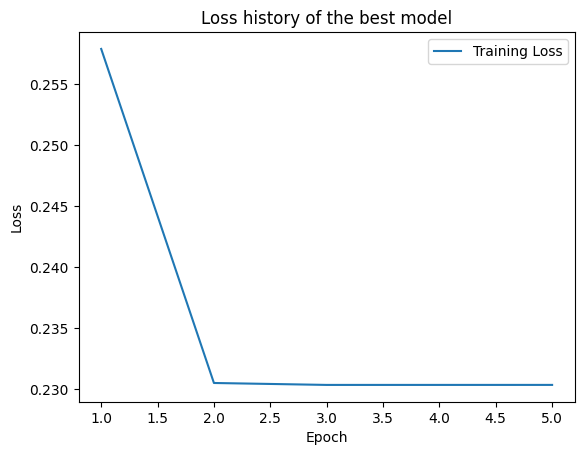

In [60]:
'''
TODO: Plot the Loss Curve for the best model using loss_history
'''
# Generate x values (epochs)
epochs = range(1, len(best_loss_history) + 1)

# Plot training and validation losses
plt.plot(epochs, best_loss_history, label='Training Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history of the best model')

# Add legend
plt.legend()

# Show plot
plt.show()

# 3 Implementation in PyTorch

Now, you need to implement the same MLP structure using PyTorch library.

## 3.1 MLP_torch class

In [ ]:
'''
TODO: PyTorch implementation
'''

import torch
import torch.nn as nn

# Define the MLP architecture
class MLP_torch(nn.Module):
    """
    TODO: Implement the MLP architecture
    """
    
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(MLP_torch, self).__init__()
        self.input_size = input_size
        self.hidden_layer_size = hidden_layer_size
        self.output_size = output_size
        
        # Define the layers
        self.input_layer = nn.Linear(input_size, hidden_layer_size)
        self.hidden_layer = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        # Forward pass through the network
        x = torch.relu(self.input_layer(x))
        x = torch.softmax(self.hidden_layer(x), dim=0)
        return x

## 3.2 Data Preprocessing

In [ ]:
import pandas as pd # Remove these later

'''
TODO: Handle the data and labels for PyTorch
'''
def data_preprocessing_torch(path_to_data, one_hot_encode_labels):
    data = pd.read_csv(path_to_data, header=None)
    y = data.iloc[:, 0]  # First column is label
    X = data.iloc[:, 1:]  # Rest of the columns are features

    if one_hot_encode_labels == True:
        # One-hot encode the labels
        y_onehot = torch.nn.functional.one_hot(torch.tensor(y.values, dtype=torch.long), num_classes=10)

        # Convert data to PyTorch tensors
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        y_tensor = y_onehot.float()

        return X_tensor, y_tensor
    
    else:
        # Convert data to PyTorch tensors
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        y_tensor = torch.tensor(y.values, dtype=torch.float32)

        return X_tensor, y_tensor

## 3.3 Training Pipeline

In [ ]:
'''
TODO: Implement the training pipeline using PyTorch
'''

import torch.optim as optim

def train_torch(mlp, inputs, targets, epochs, learning_rate, validation_data, validation_labels):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mlp.parameters(), lr=learning_rate)

    training_losses = []
    validation_losses = []

    for epoch in range(epochs):

        epoch_loss = 0.0

        # Implement the training pipeline for each example
        l = len(inputs)
        for i in range(l):
            # Forward pass - with mlp.forward
            output = mlp.forward(inputs[i])

            # Calculate Loss - with criterion (CrossEntropyLoss)
            loss = criterion(output.unsqueeze(0), targets[i].unsqueeze(0))

            # Backward pass - Compute gradients for example
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Print epoch loss here if desired (I decided to print average loss for that epoch)
        print(f'EPOCH: {epoch + 1}, Training Loss: {epoch_loss / len(inputs)}', end="")

        training_losses.append(epoch_loss / len(inputs))

        validation_loss = test_torch(mlp, validation_data, validation_labels, True)
        print(f", Validation Loss: {validation_loss}")
        validation_losses.append(validation_loss)
    
    return mlp, training_losses, validation_losses

## 3.4 Testing Pipeline

In [ ]:
'''
TODO: Implement the testing pipeline using PyTorch
'''

import torch.optim as optim

def test_torch(mlp, inputs, targets, validating=False):
    criterion = nn.CrossEntropyLoss()
    total_loss = 0.0

    with torch.no_grad():  # We don't need gradients for testing
        for i in range(len(inputs)):
            # Forward pass
            output = mlp.forward(inputs[i])

            # Calculate Loss
            loss = criterion(output.unsqueeze(0), targets[i].unsqueeze(0))
            total_loss += loss.item()

    average_loss = total_loss / len(inputs)
    
    if validating == False:
        print(f'Testing Loss: {average_loss}')
        
    return average_loss

## 3.5 Main code for PyTorch implementation

### 3.5.1 Train

In [ ]:
'''
TODO: Train and test the PyTorch model
'''

# Load the data
train_data, train_labels = data_preprocessing_torch("./train_data.csv", True)
test_data, test_labels = data_preprocessing_torch("./test_data.csv", True)
validation_data, validation_labels = test_data[:5000], test_labels[:5000] # Split the test set into test and validation set with ratio (3:1)
test_data, test_labels = test_data[5000:], test_labels[:5000:]

# Initialize the MLP with input, hidden, and output layers
input_size = 784
output_size = 10

epochs = 30 # I have seen that some parameter combinations does not converge in 10 epochs so I decided to train 30 epochs.

# Hyperparameter grid
hidden_sizes = [5, 10, 30]
learning_rates = [0.01, 0.001, 0.0001, 0.00001]

# Store grid-seach results
results = []
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        print("\n---------- Training ----------\n")
        print(f"Hyperparameters: hidden_size = {hidden_size}, learning_rate: {learning_rate}\n")
        mlp = MLP_torch(input_size=input_size, hidden_layer_size=hidden_size, output_size=output_size)
        trained_torch_mlp, training_losses, validation_losses = train_torch(mlp, train_data, train_labels, epochs, learning_rate, validation_data, validation_labels)
        results.append((hidden_size, learning_rate, training_losses, validation_losses, trained_torch_mlp))


# Testing will be done in the next cell !!!


---------- Training ----------

Hyperparameters: hidden_size = 5, learning_rate: 0.01

EPOCH: 1, Training Loss: 2.361976157772541, Validation Loss: 2.3551501343250276
EPOCH: 2, Training Loss: 2.3617001653552054, Validation Loss: 2.3551501333236695
EPOCH: 3, Training Loss: 2.3617001652359964, Validation Loss: 2.35515013256073
EPOCH: 4, Training Loss: 2.361700165069103, Validation Loss: 2.355150131559372
EPOCH: 5, Training Loss: 2.36170016490221, Validation Loss: 2.35515013051033
EPOCH: 6, Training Loss: 2.3617001646876337, Validation Loss: 2.3551501294612884
EPOCH: 7, Training Loss: 2.361700164437294, Validation Loss: 2.3551501284599303
EPOCH: 8, Training Loss: 2.36170016425848, Validation Loss: 2.35515012717247
EPOCH: 9, Training Loss: 2.361700164091587, Validation Loss: 2.355150125837326
EPOCH: 10, Training Loss: 2.3617001638054846, Validation Loss: 2.355150124502182
EPOCH: 11, Training Loss: 2.3617001635074617, Validation Loss: 2.3551501230239866
EPOCH: 12, Training Loss: 2.36170016

### 3.5.2 Test

In [ ]:
# We obtained the lowest validation loss when hidden_size = 30 and learning_rate = 0.0001
best_result = None
for result in results:
    if result[0] == 30 and result[1] == 0.0001:
        best_result = result

print("\n---------- Testing ----------\n")
test_torch(best_result[4],test_data, test_labels)


---------- Testing ----------

Testing Loss: 2.3581408536672592


2.3581408536672592

### 3.5.3 Visualize losses

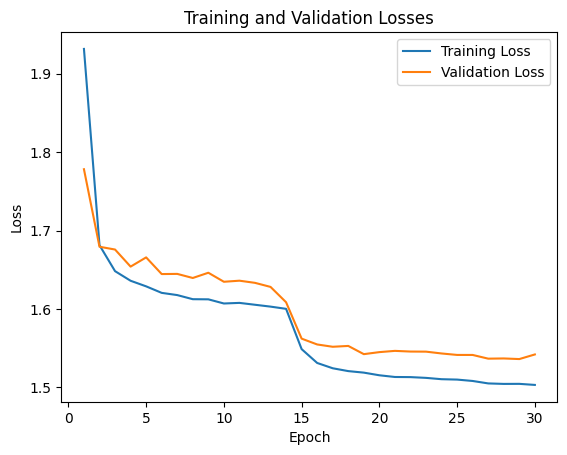

In [ ]:
training_losses = best_result[2]
validation_losses = best_result[3]

# Generate x values (epochs)
epochs = range(1, len(training_losses) + 1)

# Plot training and validation losses
plt.plot(epochs, training_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

# Add legend
plt.legend()

# Show plot
plt.show()